In [26]:
import numpy as np
import pandas as pd

from scipy import stats
import itertools
from sklearn import linear_model
from numpy import ones,vstack
from numpy.linalg import lstsq
pd.options.display.max_rows=400


In [39]:

import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
housing = pd.read_csv(r'C:\Users\rauna\Machine_Learning_Ames_Housing_Kaggle\Raunak_P\Ames_HousePrice.csv')

In [29]:
housing.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
PID,909176150,905476230,911128020,535377150,534177230
GrLivArea,856,1049,1001,1039,1665
SalePrice,126000,139500,124900,114000,227000
MSSubClass,30,120,30,70,60
MSZoning,RL,RL,C (all),RL,RL
LotFrontage,NaN,42.0,60.0,80.0,70.0
LotArea,7890,4235,6060,8146,8400
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN


In [30]:
correlation = housing.corr().abs()

s = correlation.unstack()
sortedcor = s.sort_values(kind="quicksort", ascending=False).drop_duplicates()
sortedcor=sortedcor[sortedcor<1]
#so2=so[so['']]

In [31]:
print(sortedcor.head(50))

SalePrice      SalePrice_log    0.950051
GarageArea     GarageCars       0.889603
GarageYrBlt    YearBuilt        0.834526
OverallQual    SalePrice_log    0.815961
TotRmsAbvGrd   GrLivArea        0.807445
OverallQual    SalePrice        0.790501
TotalBsmtSF    1stFlrSF         0.784634
SalePrice      GrLivArea        0.719981
GrLivArea      SalePrice_log    0.717711
TotRmsAbvGrd   BedroomAbvGr     0.693223
SalePrice_log  GarageCars       0.666527
GrLivArea      2ndFlrSF         0.665001
SalePrice      TotalBsmtSF      0.652222
SalePrice_log  GarageArea       0.645733
GrLivArea      FullBath         0.643937
SalePrice      1stFlrSF         0.642613
TotalBsmtSF    SalePrice_log    0.641638
GarageCars     SalePrice        0.638801
GarageArea     SalePrice        0.634992
BsmtFullBath   BsmtFinSF1       0.632603
GarageYrBlt    YearRemodAdd     0.625360
1stFlrSF       SalePrice_log    0.623993
2ndFlrSF       HalfBath         0.622321
YearBuilt      SalePrice_log    0.597186
2ndFlrSF       T

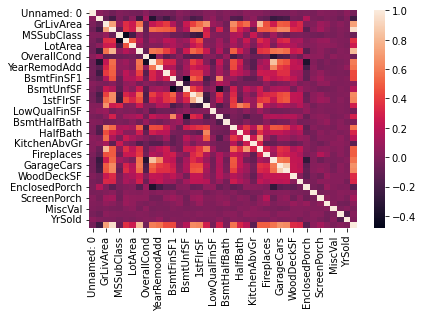

In [32]:
sns.heatmap(housing.corr());

In [33]:
# Returns correlation matrix
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    return xFiltered

# flattens correlation matrix with bounds
def corrFilterFlattened(x: pd.DataFrame, bound: float):
    xFiltered = corrFilter(x, bound)
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

# Returns correlation for a variable from flattened correlation matrix
def filterForLabels(housing: pd.DataFrame, label):  
    try:
        sideLeft = housing[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = housing[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat

def NEGcorrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr <= bound) & (xCorr >= -bound)) & (xCorr !=1.000)]
    return xFiltered

In [34]:
corrFilter(housing,.5)

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_log
Unnamed: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,0.719981,NaN,NaN,NaN,0.559897,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.717711
SalePrice,NaN,NaN,0.719981,NaN,NaN,NaN,NaN,0.790501,NaN,0.544370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.950051
MSSubClass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,0.559897,0.790501,NaN,NaN,NaN,NaN,NaN,0.574400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.815961
OverallCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,0.544370,NaN,NaN,NaN,0.574400,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.597186


In [35]:
housing2=pd.get_dummies(housing)
housing2=housing2.fillna(0)
lm=linear_model.LinearRegression()
lm.fit(housing2.drop(['SalePrice','SalePrice_log'],axis=1), housing2['SalePrice_log'])
lm.score(housing2.drop(['SalePrice','SalePrice_log'],axis=1), housing2['SalePrice_log'])

0.9407226610122637

                       Unnamed: 0       PID  GrLivArea  SalePrice  MSSubClass  \
Unnamed: 0               1.000000  0.031444  -0.009719  -0.056652    0.002765   
PID                      0.031444  1.000000  -0.102270  -0.226276   -0.005328   
GrLivArea               -0.009719 -0.102270   1.000000   0.719981    0.070785   
SalePrice               -0.056652 -0.226276   0.719981   1.000000   -0.084587   
MSSubClass               0.002765 -0.005328   0.070785  -0.084587    1.000000   
LotFrontage             -0.025818 -0.031715   0.144539   0.177180   -0.237529   
LotArea                 -0.030839  0.042049   0.260322   0.274443   -0.198040   
OverallQual             -0.043861 -0.247168   0.559897   0.790501    0.056468   
OverallCond              0.032944  0.120013  -0.105670  -0.101091   -0.075542   
YearBuilt               -0.055302 -0.337963   0.228400   0.544370    0.053852   
YearRemodAdd            -0.043235 -0.128744   0.306035   0.514309    0.056756   
MasVnrArea              -0.0

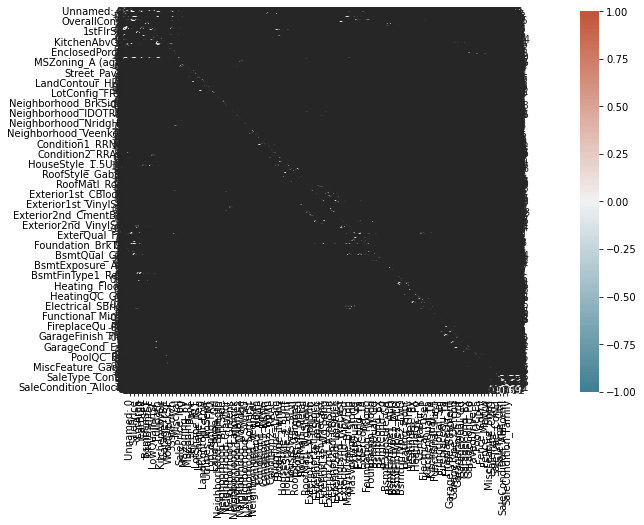

In [42]:
import seaborn as sns

corr = housing2.corr();
print(corr)

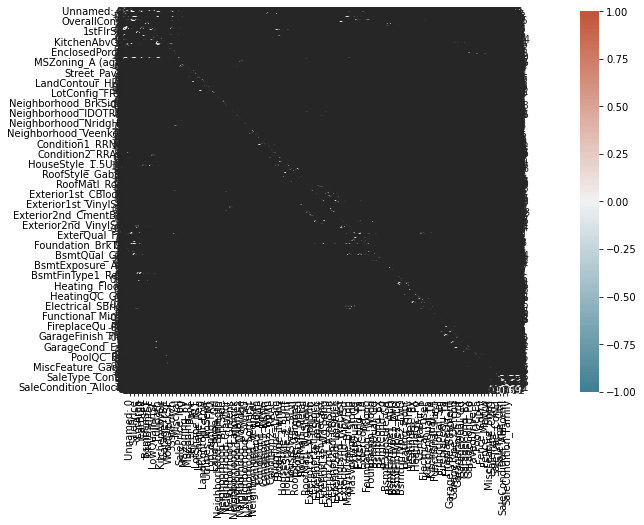

In [43]:
plt.figure(figsize=(25,7))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True);